1. Dataset Selection

In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement'
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sajindevsahadevan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement


100%|██████████| 4.51k/4.51k [00:00<00:00, 13.1MB/s]

2. Data Preprocessing

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


Loaded the dataset

In [5]:
df = pd.read_csv("/content/Placement_Data_Full_Class.csv")
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Plotted Distributions

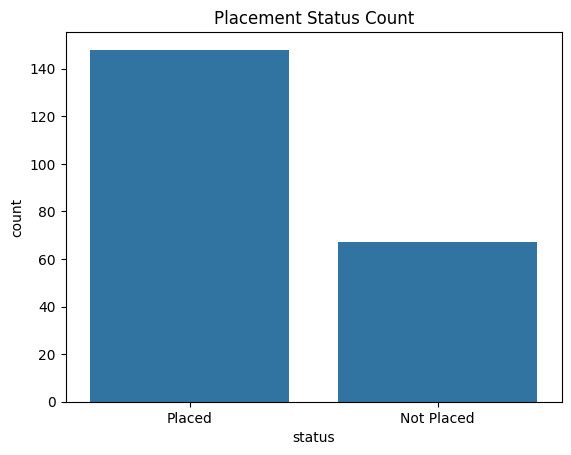

status
Placed        0.688372
Not Placed    0.311628
Name: proportion, dtype: float64


In [7]:
sns.countplot(data=df, x='status')
plt.title('Placement Status Count')
plt.show()

print(df['status'].value_counts(normalize=True))


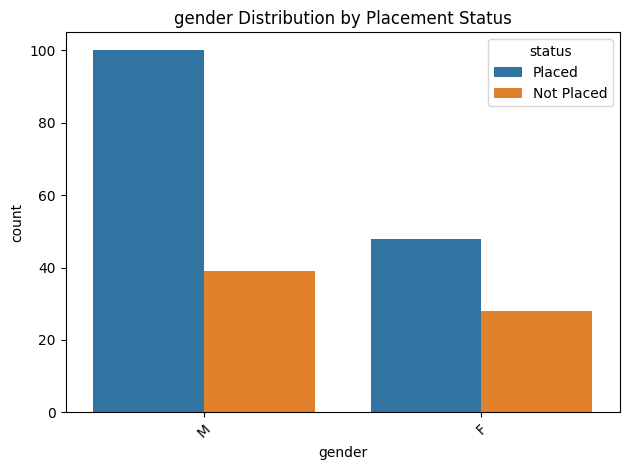

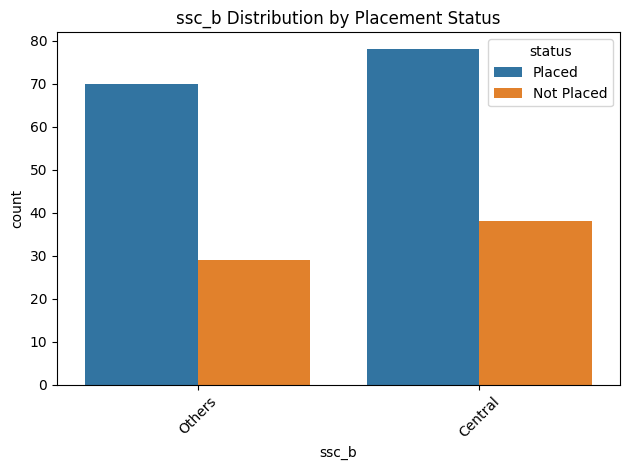

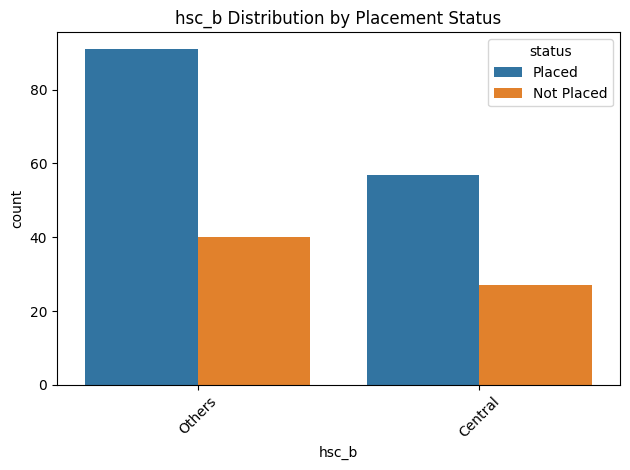

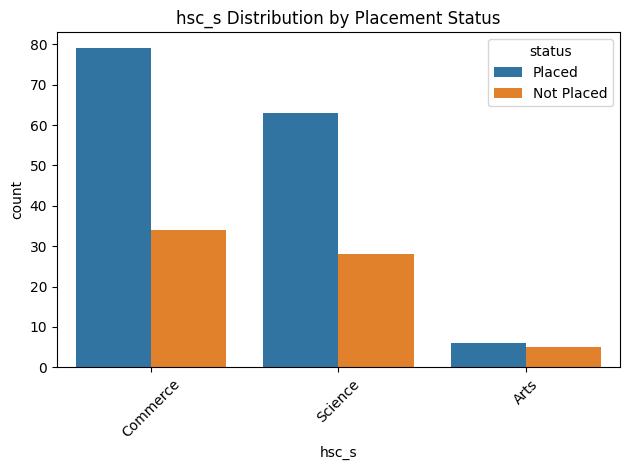

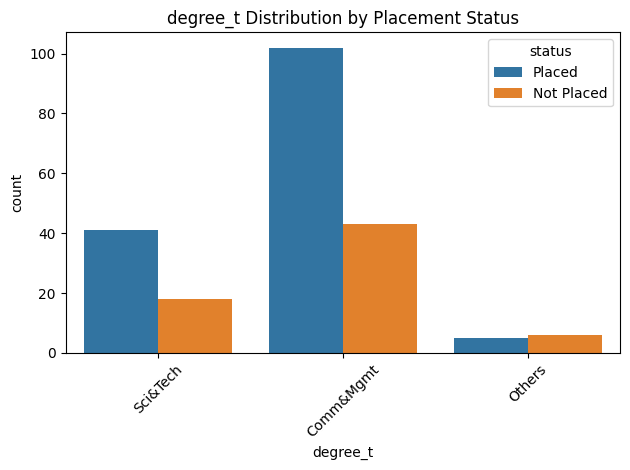

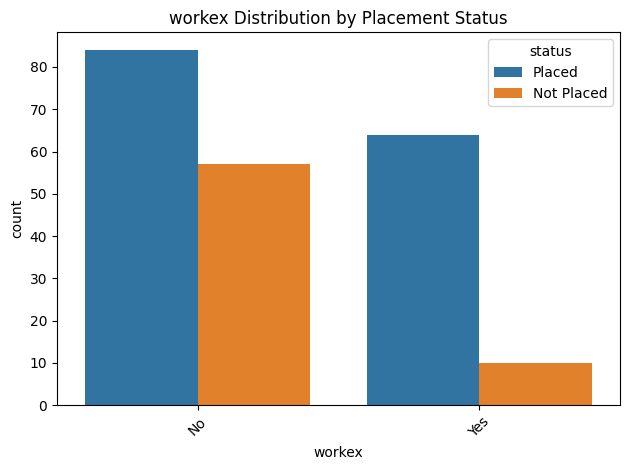

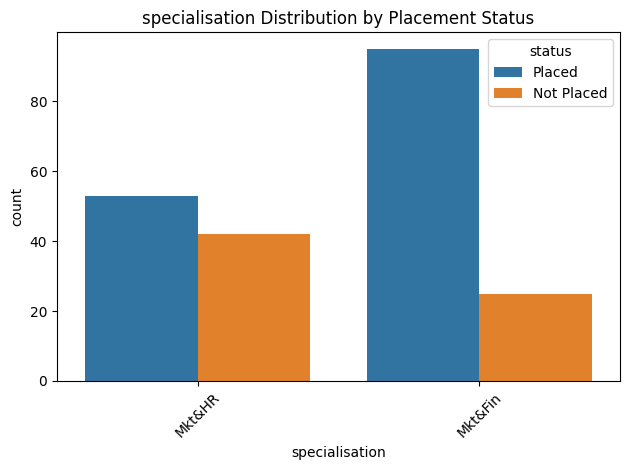

In [8]:
# Step 1: Filter only existing columns
cat_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
cat_cols = [col for col in cat_cols if col in df.columns]  # This removes missing ones

# Step 2: Plot safely
for col in cat_cols:
    sns.countplot(data=df, x=col, hue='status')
    plt.title(f'{col} Distribution by Placement Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Code for Correlation Heatmap

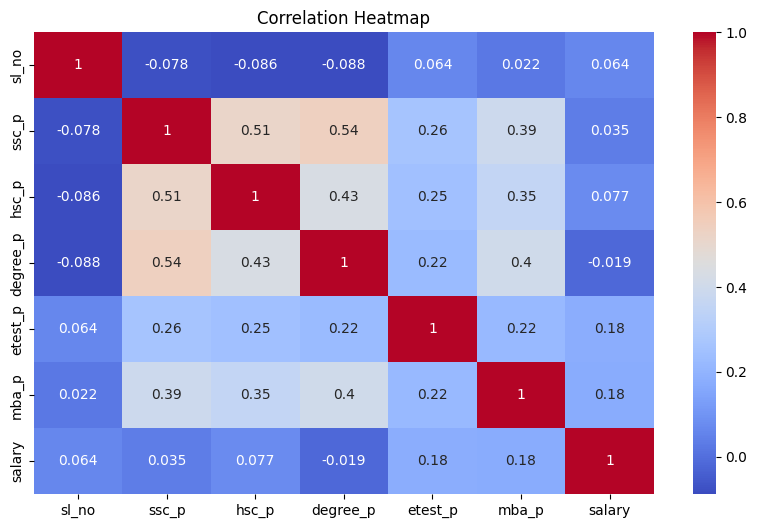

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Checked for missing values

In [10]:
# Check missing values
print(df.isnull().sum())

# Drop salary column (not usable for prediction before placement)
df = df.drop(columns=['salary'])


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


Encoded Categorical Variables

In [11]:
# Reload the dataset from scratch
df = pd.read_csv("/content/Placement_Data_Full_Class.csv")
print("Original shape:", df.shape)
print(df.head())


Original shape: (215, 15)
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [12]:
from sklearn.preprocessing import LabelEncoder

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop salary — okay because it's missing for unplaced students
if 'salary' in df.columns:
    df = df.drop(columns=['salary'])

# Encode target variable safely
if 'status' in df.columns:
    df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

# Encode binary features
le = LabelEncoder()
for col in ['gender', 'workex', 'specialisation']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# One-hot encode only available columns
columns_to_encode = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t']
available_columns = [col for col in columns_to_encode if col in df.columns]

if available_columns:
    df = pd.get_dummies(df, columns=available_columns, drop_first=True)

# Final shape check
print("Shape after preprocessing:", df.shape)


Shape after preprocessing: (215, 16)


Train test split

In [13]:
# Prepare features and labels
X = df.drop(columns=[col for col in ['status', 'sl_no'] if col in df.columns])
y = df['status']

# Check again
print("Shape of X:", X.shape)
print("Target distribution:\n", y.value_counts())

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


Shape of X: (215, 14)
Target distribution:
 status
1    148
0     67
Name: count, dtype: int64


3. Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Random Forest with basic tuning
rf_params = {'n_estimators': [100, 150], 'max_depth': [None, 10, 20]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)

# Support Vector Machine with basic tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)

# Train all models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Display best parameters for tuned models
print("Best Random Forest Params:", rf.best_params_)
print("Best SVM Params:", svm.best_params_)


Best Random Forest Params: {'max_depth': None, 'n_estimators': 100}
Best SVM Params: {'C': 0.1, 'kernel': 'linear'}


4. Model Training

In [ ]:
# Already trained in Point 3
print("Training completed for all models.")


Training completed for all models.


5. Model Evaluation

In [ ]:
# Optionally wrap training in a dictionary
trained_models = {
    'Logistic Regression': logreg,
    'Random Forest': rf.best_estimator_,
    'SVM': svm.best_estimator_
}



===== Logistic Regression =====
              precision    recall  f1-score   support

           0      0.667     0.500     0.571        20
           1      0.800     0.889     0.842        45

    accuracy                          0.769        65
   macro avg      0.733     0.694     0.707        65
weighted avg      0.759     0.769     0.759        65



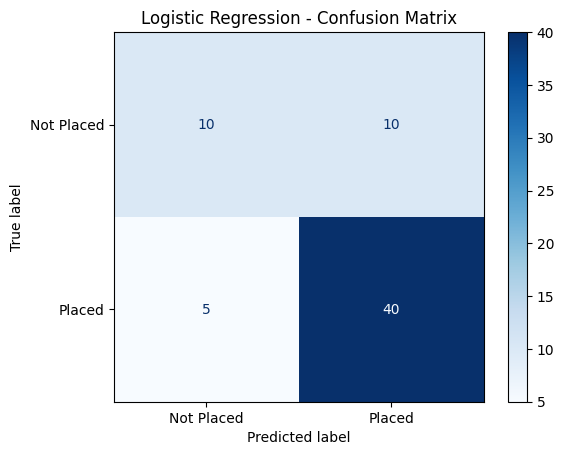


===== Random Forest =====
              precision    recall  f1-score   support

           0      0.867     0.650     0.743        20
           1      0.860     0.956     0.905        45

    accuracy                          0.862        65
   macro avg      0.863     0.803     0.824        65
weighted avg      0.862     0.862     0.855        65



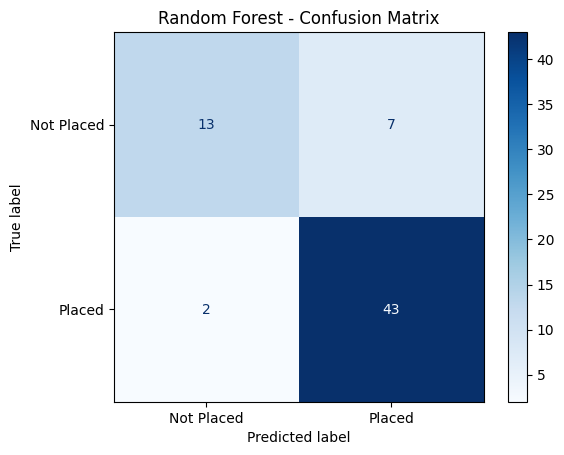


===== SVM =====
              precision    recall  f1-score   support

           0      0.688     0.550     0.611        20
           1      0.816     0.889     0.851        45

    accuracy                          0.785        65
   macro avg      0.752     0.719     0.731        65
weighted avg      0.777     0.785     0.777        65



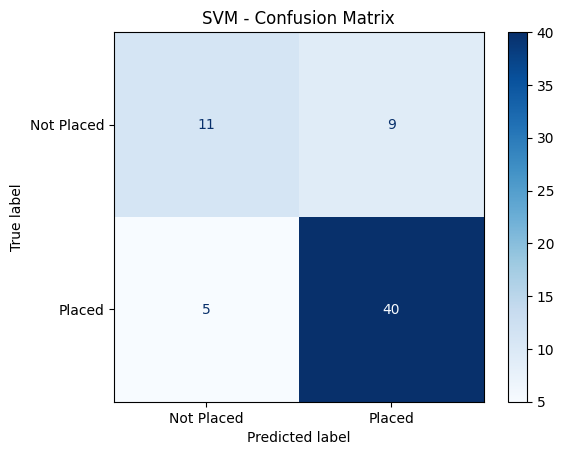

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate and display metrics for all models
for name, model in trained_models.items():
    print(f"\n===== {name} =====")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed', 'Placed'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


6. Voting Classifier


===== Voting Classifier Evaluation =====
Accuracy: 0.8
Precision: 0.8076923076923077
Recall: 0.9333333333333333
F1 Score: 0.865979381443299


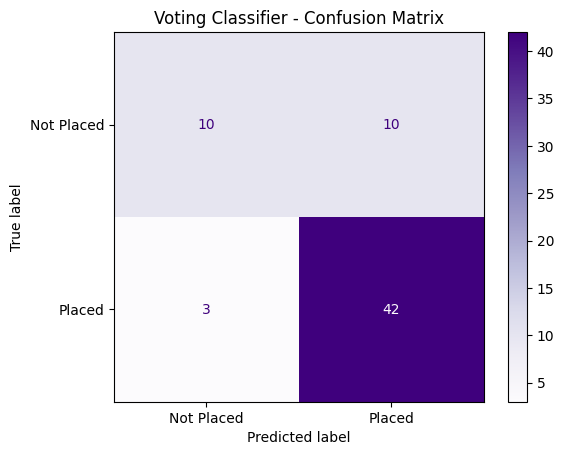

In [ ]:
from sklearn.ensemble import VotingClassifier

# Soft Voting Classifier with all best estimators
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', logreg),
        ('Random Forest', rf.best_estimator_),
        ('SVM', svm.best_estimator_)
    ],
    voting='soft'
)

# Train voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_vote = voting_clf.predict(X_test)

print("\n===== Voting Classifier Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Precision:", precision_score(y_test, y_pred_vote))
print("Recall:", recall_score(y_test, y_pred_vote))
print("F1 Score:", f1_score(y_test, y_pred_vote))

# Confusion Matrix
cm_vote = confusion_matrix(y_test, y_pred_vote)
disp_vote = ConfusionMatrixDisplay(confusion_matrix=cm_vote, display_labels=['Not Placed', 'Placed'])
disp_vote.plot(cmap='Purples')
plt.title("Voting Classifier - Confusion Matrix")
plt.show()
